<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2020 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 3 (três) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes, e separe os 50 (cinquenta) ativos mais líquidos; </li><p></p>
    <li>Construa uma amostra de treinamento e outra de teste, sendo a primeira com os 2 (dois) primeiros anos e a segunda com o último anos; </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz, nos ativos separados na fase de treinamento, amostra de teste que representa o último ano da aquisição; </li><p></p>
    <li> Descreva suas impressores relativas ao processo e resultados encontrados. </li>
</ol>
</div>


### Questão 1: 

## Extração

Os dados das ações que compõem cada índice são extraídas diretamente da B3 através do seguinte [link](http://www.b3.com.br/pt_br/market-data-e-indices/indices/acoes-por-indice/), no fim da paǵina existe uma opção para realizar o download da planilha contendo as informações apresentadas.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stock_by_index = pd.read_html('data/AcoesIndices.SetDez.2020.xls')[0]

In [3]:
stock_by_index.head()

RELA��O DE A��ES POR �NDICE - SETEMBRO A DEZEMBRO DE 2020Atualizado em 22/09/2020  \
                                                                            �ndices   
                                                                 Unnamed: 0_level_2   
0                                                 3M                                  
1                                         ABC BRASIL                                  
2                                       ADVANCED MIC                                  
3                                        ADVANCED-DH                                  
4                                        AES TIETE E                                  

                                                                       ...  \
                                                                       ...   
  Unnamed: 1_level_2    BDRX IBOV    IBRA IBXL IBXX ICO2 ICON    IDIV  ...   
0                DRN  MMMC34  NaN     NaN  NaN  NaN  NaN  NaN     NaN  ...   
1              PN N2     NaN  NaN   ABCB4  NaN  NaN  NaN  NaN   ABCB4  ...   
2                DRN  A1MD34  NaN     NaN  NaN  NaN  NaN  NaN     NaN  ...   
3                 ON     NaN  NaN     NaN  NaN  NaN  NaN  NaN     NaN  ...   
4             UNT N2     NaN  NaN  TIET11  NaN  NaN  NaN  NaN  TIET11  ...   

                                                                 
                                                                 
  IGNM IMAT IMOB INDX    ISEE    ITAG IVBX MLCX    SMLL    UTIL  
0  NaN  NaN  NaN  NaN     NaN     NaN  NaN  NaN     NaN     NaN  
1  NaN  NaN  NaN  NaN     NaN   ABCB4  NaN  NaN   ABCB4     NaN  
2  NaN  NaN  NaN  NaN     NaN     NaN  NaN  NaN     NaN     NaN  
3  NaN  NaN  NaN  NaN     NaN   ADHM3  NaN  NaN     NaN     NaN  
4  NaN  NaN  NaN  NaN  TIET11  TIET11  NaN  NaN  TIET11  TIET11  

[5 rows x 25 columns]

In [4]:
# Fix MultiIndex on columns
stock_by_index.columns = [col[2] for col in stock_by_index.columns]

In [5]:
stock_by_index.head()

,Unnamed: 0_level_2,Unnamed: 1_level_2,BDRX,IBOV,IBRA,IBXL,IBXX,ICO2,ICON,IDIV,...,IGNM,IMAT,IMOB,INDX,ISEE,ITAG,IVBX,MLCX,SMLL,UTIL
0,3M,DRN,MMMC34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABC BRASIL,PN N2,NaN,NaN,ABCB4,NaN,NaN,NaN,NaN,ABCB4,...,NaN,NaN,NaN,NaN,NaN,ABCB4,NaN,NaN,ABCB4,NaN
2,ADVANCED MIC,DRN,A1MD34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADVANCED-DH,ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ADHM3,NaN,NaN,NaN,NaN
4,AES TIETE E,UNT N2,NaN,NaN,TIET11,NaN,NaN,NaN,NaN,TIET11,...,NaN,NaN,NaN,NaN,TIET11,TIET11,NaN,NaN,TIET11,TIET11


Remove as duas primeiras colunas que não são relevantes para a análise.

In [6]:
stock_by_index.drop(stock_by_index.columns[:2], axis=1, inplace=True)

## Selecionando os índices com o maior número de ativos

Foram selecionados os **5** primeiros índices que contém o maior número de ativos.

In [7]:
qtd_stocks_by_indexes = stock_by_index.iloc[-1].astype('int64')
selected_indexes = qtd_stocks_by_indexes.sort_values(ascending=False).head(5).index.tolist()

In [8]:
print('Índices selecionados: %s' % selected_indexes)

Índices selecionados: ['IGCX', 'ITAG', 'IBRA', 'IGCT', 'IGNM']


## Extraindo a lista de ativos que fazem parte dos índices

A seguir é feita a seleção no dataframe original das colunas correspondentes aos índices selecionados. É necessário descartar a última linha do dataframe original, pois essa linha não carrega informações relevantes para as etapas seguintes.

In [9]:
stocks_selected_indexes = stock_by_index[:-1][selected_indexes]

Para descartar os valores duplicados, primeiro é necessário substituir os valors `nan` por `'-'`. Em seguida aplicamos o método `numpy.unique` no dataframe resultante para ter como resultado somente as ações únicas através dos 5 índices. Por último removemos o valor `'-'`.

In [10]:
stock_list = np.unique(stocks_selected_indexes.fillna('-')).tolist()
stock_list.remove('-')

Como resultado temos uma lista de:

In [11]:
print("%s ativos únicos" % len(stock_list))

223 ativos únicos


## Baixando dados das cotações

In [19]:
from pandas_datareader import DataReader
from tqdm import tqdm

In [20]:
def download_yahoo_quotes(list_symbols, start_date, final_date):
    """
    Realiza o download das cotações do Yahoo.
    
    Params:
        list_symbols : list 
            Lista de símbolos dos ativos escolhidos;
        start_date : str
            Data inicial do período desejado no formato: %Y-%m-%d
        final_date : str
            Data final do período desejado no formato: %Y-%m-%d
    """
    daily_quotes = pd.DataFrame()
    daily_volume = pd.DataFrame()
    symbols = []
    errors = []
    for symbol in tqdm(list_symbols):
        
        if not symbol.endswith('.SA'):
            symbol_sa = "%s.SA" % symbol
        else:
            symbol_sa = symbol
            
        try:
            df = DataReader(symbol_sa, 'yahoo', start_date, final_date)

            close_price = df["Adj Close"]
            volume = df["Volume"]
            symbols.append(symbol)

            daily_quotes = pd.concat([daily_quotes, close_price], axis=1)
            daily_volume = pd.concat([daily_volume, volume], axis=1)

            daily_quotes.columns = symbols
            daily_volume.columns = symbols
        except:
            errors.append(symbol)
            
    print('Erro ao baixar os dados dos ativos: %s' % errors)   
    return daily_quotes, daily_volume

In [21]:
start_date = '2017-09-01'
final_date = '2020-09-01'

raw_stocks_quotes, raw_stocks_volumes = download_yahoo_quotes(stock_list, start_date, final_date)

100%|██████████| 223/223 [03:55<00:00,  1.05s/it]

Erro ao baixar os dados dos ativos: ['CURY3', 'LAVV3', 'PETZ3', 'PGMN3', 'PLPL3', 'SIMH3']


Erros: 10568.
Ativos com valores vazios: ['ALPK3', 'AMBP3', 'BIDI11', 'BIDI4', 'BKBR3', 'BMGB4', 'BRDT3', 'CAML3', 'CEAB3', 'CNTO3', 'DMVF3', 'GNDI3', 'HAPV3', 'LJQQ3', 'LOGG3', 'LWSA3', 'MDNE3', 'MTRE3', 'NEOE3', 'NTCO3', 'PRNR3', 'SAPR11', 'SOMA3', 'VIVA3']


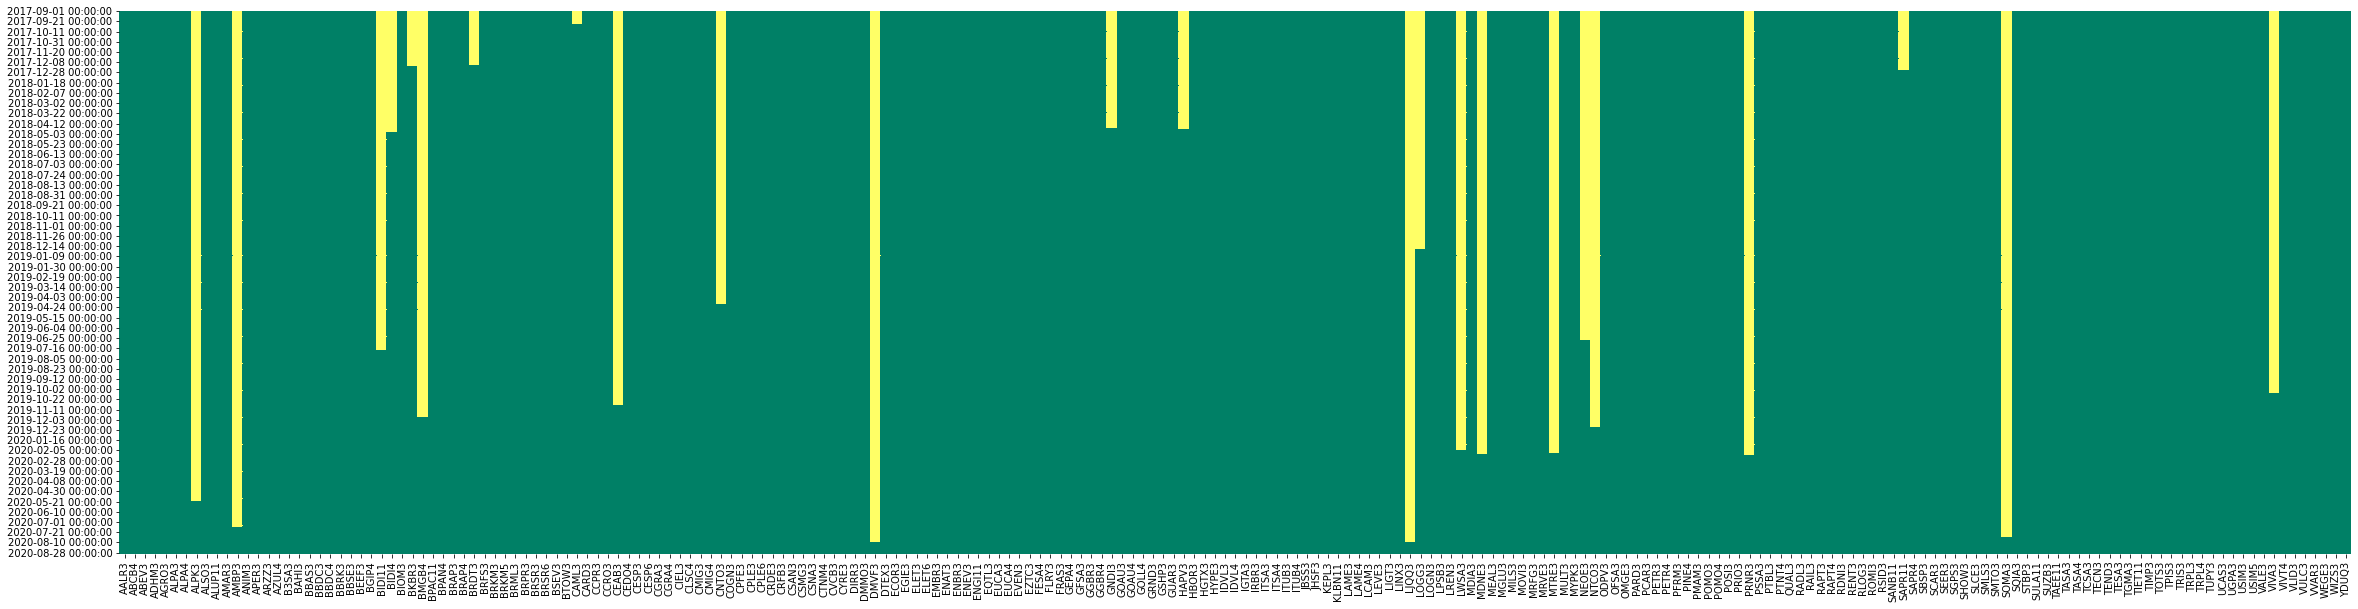

In [47]:
plt.figure(figsize=(40,10))

sns.heatmap(raw_stocks_quotes.isnull(),  cbar=False, cmap = 'summer')
columns_with_na = raw_stocks_quotes.columns[raw_stocks_quotes.isna().any()].tolist()

print("Erros: %s.\nAtivos com valores vazios: %s" % (np.sum(raw_stocks_quotes.isnull().sum()), columns_with_na))

Os ativos com dias nulos serão removidos do conjunto.

In [48]:
valid_stocks_quotes = raw_stocks_quotes.dropna(axis=1)
valid_stocks_volume = raw_stocks_volumes.dropna(axis=1)

## Selecionando os ativos com maior liquidez

Os 50 ativos mais líquidos serão selecionados pelos que tem a maior média de volume no período analisado.

In [50]:
qtd_stocks = 50
high_volume_stocks_sym = valid_stocks_volume.mean().sort_values(ascending=False).head(qtd_stocks).index.tolist()

In [51]:
stock_quotes = valid_stocks_quotes[high_volume_stocks_sym].copy()

In [57]:
print("Os %s ativos mais líquidos:\n%s" % (qtd_stocks, stock_quotes.columns.tolist()))

Os 50 ativos mais líquidos:
['PETR4', 'VVAR3', 'ITUB4', 'ITSA4', 'BBDC4', 'VALE3', 'COGN3', 'ABEV3', 'CIEL3', 'USIM5', 'PETR3', 'GOAU4', 'GGBR4', 'BBAS3', 'MGLU3', 'JBSS3', 'CMIG4', 'CSNA3', 'B3SA3', 'IRBR3', 'BRML3', 'RAIL3', 'CCRO3', 'TCSA3', 'BRFS3', 'RADL3', 'MRFG3', 'EQTL3', 'LAME4', 'SUZB3', 'GOLL4', 'RENT3', 'UGPA3', 'TIMP3', 'EMBR3', 'POMO4', 'LREN3', 'AZUL4', 'MRVE3', 'ELET3', 'CYRE3', 'KLBN11', 'BBSE3', 'WEGE3', 'BEEF3', 'MULT3', 'CRFB3', 'ECOR3', 'YDUQ3', 'JHSF3']


### Questão 2: 

In [59]:
from datetime import datetime

In [61]:
initial_date_train = stock_quotes.index.min()
final_date_train = datetime(year=2019, month=9, day=1)

train_stocks = stock_quotes[(stock_quotes.index >= initial_date_train) & (stock_quotes.index <= final_date_train)].copy()

In [63]:
initial_date_test = datetime(year=2019, month=9, day=2)
final_date_test = stock_quotes.index.max()

test_stocks = stock_quotes[(stock_quotes.index >= initial_date_test) & (stock_quotes.index <= final_date_test)].copy()

### Questão 3: 

In [137]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

Primeiro é necessário calcular a porcentagem da rentabilidade diária de cada ativo.

In [67]:
train_return_pct = 100 * train_stocks.pct_change()

Em seguida é calculado o desvio padrão e a média de rentabilidade diária de cada ativo.

In [69]:
stocks_sym = train_return_pct.columns

X = np.array([[np.std(train_return_pct[st]), np.mean(train_return_pct[st])] for st in stocks_sym])

Funções de suporte para a análise de clusters.

In [158]:
def elbow_analysis(X, type_dataset):
    inertias_X = []

    for i in range(1, 30):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        inertias_X.append(kmeans.inertia_)

    plt.plot(range(1, 30), inertias_X)
    plt.title('Análise de Elbow %s' % type_dataset)
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS')
    plt.show()

In [167]:
def cluster_analysis(X, num_clusters, type_dataset):

    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
    y_predict = kmeans.predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_predict)
    centers = kmeans.cluster_centers_
    print("Silhoutte score: %s"% silhouette_score(X, y_predict))
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2)
    plt.title('Clusterização valores %s' % type_dataset)
    plt.show()

## Normalização 

Será aplicado dois métdos de normalização para permitir a comparação entre os resultados da clusterização. O primeiro método é o [StandarScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler).

In [160]:
X_std = StandardScaler().fit_transform(X)

O segundo método é o [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn-preprocessing-minmaxscaler).

In [161]:
X_minmax = MinMaxScaler().fit_transform(X)

In [169]:
datasets = {
    'Sem normalização': X,
    'StandardScaler': X_std,
    'MinMaxScaler': X_minmax
}

## Método de Elbow

Será aplicado o método de Elbow em cada um dos datasets, o sem normalização, o normalizado através do [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler). e o normalizado através do [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn-preprocessing-minmaxscaler) para decidir qual é a melhor quantidade de clusters a ser utilizada.

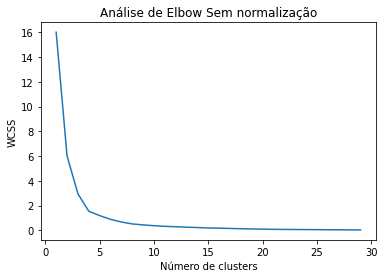

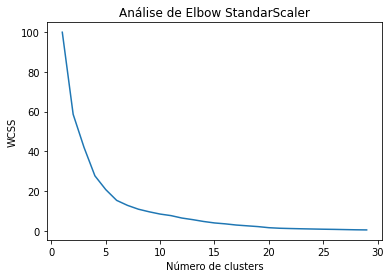

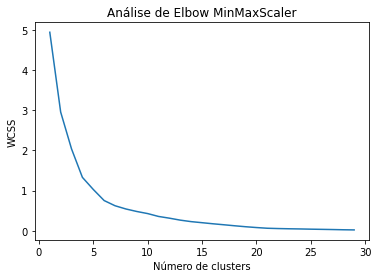

In [163]:
for key, dataset in datasets.items():
    elbow_analysis(dataset, key)

### Análise com 4 clusters

Silhoutte score: 0.5367956886429396


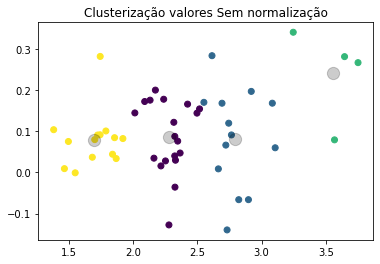

Silhoutte score: 0.401606694515954


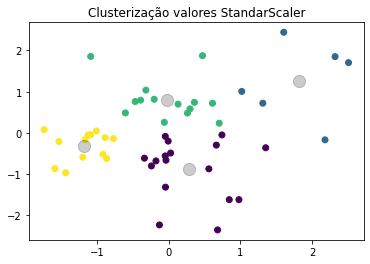

Silhoutte score: 0.4064158897815306


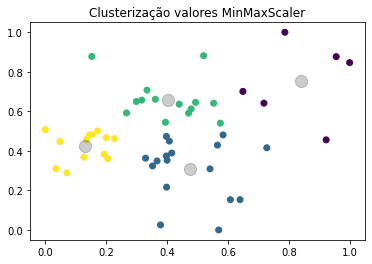

In [168]:
for key, dataset in datasets.items():
    cluster_analysis(dataset, 4, key)

## Análise com 5 clusters

Silhoutte score: 0.5214947011429465


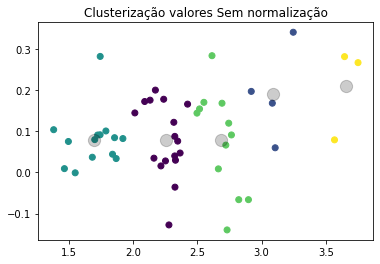

Silhoutte score: 0.4160733715037519


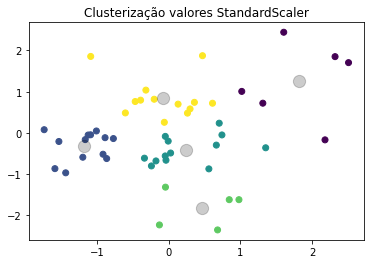

Silhoutte score: 0.4149029076846181


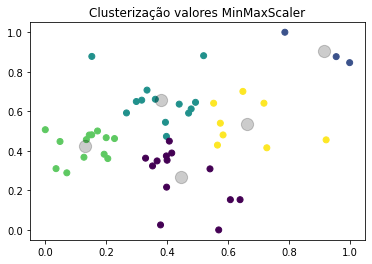

In [170]:
for key, dataset in datasets.items():
    cluster_analysis(dataset, 5, key)

### Questão 4: 

### Questão 5: 

### Questão 6: 